# Clustering of cleaned USPTO using NameRxn from Nextmove software

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in rxn class data:
with open("data/orderly_cond_classes.smi", "r") as file:
    lines = file.readlines()

# Split each line and create a list of lists
data = [line.strip().split(" ") for line in lines]

# Create a dataframe
df = pd.DataFrame(data, columns=['Reaction_String', 'Reaction_Class'])

# Read in reaction conditions data
df2 = pd.read_parquet("data/orderly_condition_train.parquet")
df3 = pd.read_parquet("data/orderly_condition_test.parquet")

# Merge the two dataframes
df4 = pd.concat([df2, df3])
df[['solvent_000', 'solvent_001', 'agent_000', 'agent_001', 'agent_002']] = df4[['solvent_000', 'solvent_001', 'agent_000', 'agent_001', 'agent_002']]

df['Reaction_Class'] = df['Reaction_Class'].replace('0.0', '0.0.0')

# Split the 'Reaction_Class' column
df['super class'] = df['Reaction_Class'].str.split('.').str[0]
df['mid class'] = df['Reaction_Class'].str.split('.').str[0] + '.' + df['Reaction_Class'].str.split('.').str[1]







In [3]:
super_class_dict = {
    "0": "Unassigned",
    "1": "Heteroatom alkylation and arylation",
    "2": "Acylation and related processes",
    "3": "C-C bond formation",
    "4": "Heterocycle formation",
    "5": "Protections",
    "6": "Deprotections",
    "7": "Reductions",
    "8": "Oxidations",
    "9": "Functional group interconversion (FGI)",
    "10": "Functional group addition (FGA)",
    "11": "Resolution",
    "12": "Miscellaneous"
}

In [4]:
mid_class_dict = {
    "0": "Unassigned",
    "0.1": "Failed reaction",
    "0.2": "Compound purchase",
    "1": "Heteroatom alkylation and arylation",
    "1.1": "N-substitution with alkyl-X",
    "1.2": "Reductive amination",
    "1.3": "N-arylation with Ar-X",
    "1.4": "Amide N-alkylation",
    "1.5": "Aniline N-alkylation",
    "1.6": "Heteroaryl N-alkylation",
    "1.7": "O-substitution",
    "1.8": "S-substitution",
    "1.9": "Other heteroatom alkylation/arylation",
    "2": "Acylation and related processes",
    "2.1": "N-acylation to amide",
    "2.2": "N-sulfonylation",
    "2.3": "N-acylation to urea",
    "2.4": "Carbamate/carbonate formation",
    "2.5": "Amidine formation",
    "2.6": "O-acylation to ester",
    "2.7": "O-sulfonylation",
    "2.8": "Other acylation",
    "3": "C-C bond formation",
    "3.1": "Suzuki coupling",
    "3.2": "Heck reaction",
    "3.3": "Sonogashira reaction",
    "3.4": "Stille reaction",
    "3.5": "Other Pd-catalyzed reactions (Negishi, Kumada, etc.)",
    "3.6": "Ester condensation",
    "3.7": "Grignard",
    "3.8": "Wittig olefination",
    "3.9": "Other organometallic C-C bond formation",
    "3.10": "Friedel-Crafts acylation",
    "3.11": "Other C-C bond formation",
    "4": "Heterocycle formation",
    "4.1": "N-containing heterocycle formation",
    "4.2": "O-containing heterocycle formation",
    "4.3": "S-containing heterocycle formation",
    "4.4": "Other heterocycle forming reactions",
    "5": "Protections",
    "5.1": "NH protections",
    "5.2": "RCO2H protections",
    "5.3": "ROH protections",
    "5.4": "RSH protections",
    "5.5": "Other protections",
    "6": "Deprotections",
    "6.1": "NH deprotections",
    "6.2": "RCO2H deprotections",
    "6.3": "ROH deprotections",
    "6.4": "RSH deprotections",
    "6.5": "Other deprotections",
    "7": "Reductions",
    "7.1": "Nitro to amine reduction",
    "7.2": "Amide to amine reduction",
    "7.3": "Cyano or imine to amine",
    "7.4": "Ester to alcohol",
    "7.5": "Ketone to alcohol",
    "7.6": "Alkene to alkane",
    "7.7": "Alkyne to alkane",
    "7.8": "Aryl/hetaryl to fully saturated",
    "7.9": "Other reductions",
    "8": "Oxidations",
    "8.1": "Alcohols to aldehydes",
    "8.2": "Oxidations at sulphur",
    "8.3": "Alcohols to acids",
    "8.4": "Oxidations at nitrogen",
    "8.5": "Alkene oxidative cleavage",
    "8.6": "Benzylic/allylic oxidation",
    "8.7": "Alkene oxidation",
    "8.8": "Other oxidations",
    "9": "Functional group interconversion (FGI)",
    "9.1": "Alcohol to halide",
    "9.2": "Amide to imidoyl chloride",
    "9.3": "Acid to acid chloride",
    "9.4": "Nitrile to acid",
    "9.5": "Dehydration",
    "9.6": "Carbonyl to C=N",
    "9.7": "Other functional group interconversion",
    "10": "Functional group addition (FGA)",
    "10.1": "Halogenation",
    "10.2": "Nitration",
    "10.3": "Sulfonation",
    "10.4": "Other functional group addition",
    "11": "Resolution",
    "11.1": "Purification",
    "11.2": "Separation",
    "11.3": "Chiral separation",
    "11.4": "Ion exchange",
    "11.5": "Isomerization",
    "11.6": "Purification",
    "11.7": "Racemization",
    "11.8": "Salt formation",
    "11.9": "Separation",
    "12": "Miscellaneous",
    "12.1": "Diazald diazomethane preparation",
    "12.2": "MNNG diazomethane preparation"
}
mid_class_dict = {key: f"{key} {value}" for key, value in mid_class_dict.items()}

In [5]:
df['super class'] = df['super class'].map(super_class_dict)
df['mid class'] = df['mid class'].map(mid_class_dict)
df.head()

,Reaction_String,Reaction_Class,solvent_000,solvent_001,agent_000,agent_001,agent_002,super class,mid class
0,CC(C)(C)OC(=O)[N:14]1[CH2:13][CH2:12][CH:11]([...,6.1.1,O,CC(=O)O,[Fe],[Na+],[OH-],Deprotections,6.1 NH deprotections
1,CN1C(=O)C(Br)=C(C2=C(CCCCC3=Cc4ccccc4N3)Nc3ccc...,0.0.0,CCO,None,Cl,None,None,Unassigned,NaN
2,BrC(Br)(Br)Br.O[CH2:1][c:2]1[cH:3][c:4]2[cH:5]...,9.1.5,CCO,None,Cl,None,None,Functional group interconversion (FGI),9.1 Alcohol to halide
3,O=[N+:21]([O-])[c:20]1[cH:19][cH:18][c:17](-[c...,7.1.1,CCO,None,[K+],[OH-],Cl,Reductions,7.1 Nitro to amine reduction
4,O[CH2:10][CH2:9][NH:8][C:6]([O:5][C:2]([CH3:1]...,1.7.7,O,None,O=N[O-],[Na+],None,Heteroatom alkylation and arylation,1.7 O-substitution


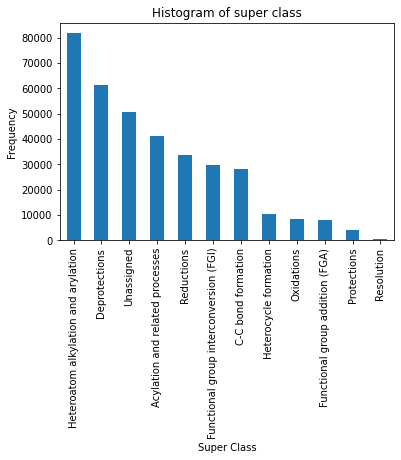

In [6]:
# Plot histogram
df['super class'].value_counts().plot(kind='bar')
plt.title('Histogram of super class')
plt.xlabel('Super Class')
plt.ylabel('Frequency')
plt.show()

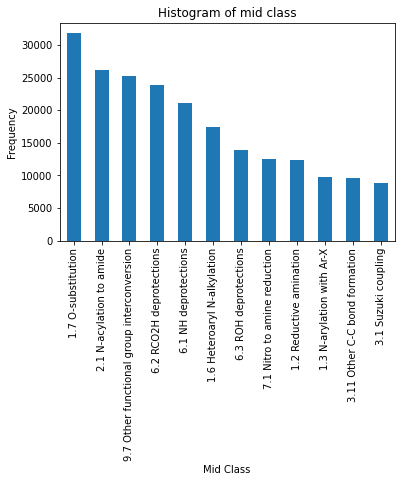

In [7]:
# Plot histogram
df['mid class'].value_counts()[:12].plot(kind='bar')
plt.title('Histogram of mid class')
plt.xlabel('Mid Class')
plt.ylabel('Frequency')
plt.show()

## Build train test splits based on rxn class

In [8]:
# Remove unassigned reactions
df = df[df['super class'] != '0.0.0']

In [9]:
super_class_train = df[df['super class'] != '3']
super_class_test = df[df['super class'] == '3']
# save as parquet
super_class_train.to_parquet('data/super_class_train.parquet')
super_class_test.to_parquet('data/super_class_test.parquet')

In [10]:
# For subclass split, randomly select one of the mid classes from each super class
# I used google rng to select a random subclass from each
# 1.5
# 2.4
# 3.8
# 4.2
# 5.4
# 6.1
# 7.5
# 8.1
# 9.3
# 10.2
# 11.4
# 12.1
# List of values to filter
values_to_exclude = ['1.5', '2.4', '3.8', '4.2', '5.4', '6.1', '7.5', '8.1', '9.3', '10.2', '11.4', '12.1']

# Create train and test dataframes
train_df = df[~df['mid class'].isin(values_to_exclude)]
test_df = df[df['mid class'].isin(values_to_exclude)]
# save as parquet
train_df.to_parquet('data/mid_class_train.parquet')
test_df.to_parquet('data/mid_class_test.parquet')